In [3]:
import whitebox
import whitebox_workflows as wbw
# import geemap
# import rioxarray as rxr
# import rasterio
# import earthpy as et
# import earthpy.plot as ep
# import matplotlib.pyplot as plt
# import geopandas as gpd
# from rasterio.plot import plotting_extent

In [2]:
wbt = whitebox.WhiteboxTools()

Decompressing WhiteboxTools_darwin_m_series.zip ...
WhiteboxTools package directory: /Users/mouse13/anaconda3/envs/ocenv/lib/python3.11/site-packages/whitebox


In [7]:
wbt.lidar_info(
    i="/Users/mouse13/maps_data/shiprock.laz",
    output='/Users/mouse13/maps_data/shiprock_info.txt',
)

./whitebox_tools --run="LidarInfo" --input='/Users/mouse13/maps_data/shiprock.laz' --output='/Users/mouse13/maps_data/shiprock_info.txt' --density --vlr --geokeys -v --compress_rasters=False

****************************
* Welcome to LidarInfo     *
* Powered by WhiteboxTools *
* www.whiteboxgeo.com      *
****************************
Complete! Please see /Users/mouse13/maps_data/shiprock_info.txt for output.


0

In [8]:
wbt.lidar_histogram(
    i="/Users/mouse13/maps_data/shiprock.laz",
    output="/Users/mouse13/maps_data/shiprock_elevation_histogram.html",
    parameter="elevation",
    clip=0 # We don't want to clip tails. show difference between original and that will suffix 2
)

./whitebox_tools --run="LidarHistogram" --input='/Users/mouse13/maps_data/shiprock.laz' --output='/Users/mouse13/maps_data/shiprock_elevation_histogram.html' --parameter=elevation --clip=0 -v --compress_rasters=False

*****************************
* Welcome to LidarHistogram *
* Powered by WhiteboxTools  *
* www.whiteboxgeo.com       *
*****************************
reading input LiDAR file...
Calculating min and max: 0%
Calculating min and max: 1%
Calculating min and max: 2%
Calculating min and max: 3%
Calculating min and max: 4%
Calculating min and max: 5%
Calculating min and max: 6%
Calculating min and max: 7%
Calculating min and max: 8%
Calculating min and max: 9%
Calculating min and max: 10%
Calculating min and max: 11%
Calculating min and max: 12%
Calculating min and max: 13%
Calculating min and max: 14%
Calculating min and max: 15%
Calculating min and max: 16%
Calculating min and max: 17%
Calculating min and max: 18%
Calculating min and max: 19%
Calculating min and max: 20%
Calcu

0

In [10]:
wbt.lidar_idw_interpolation(
    i="/Users/mouse13/maps_data/shiprock.laz",
    output="/Users/mouse13/maps_data/shiprock_idw_dem.tif",
    returns="last",
    resolution=1,
)

./whitebox_tools --run="LidarIdwInterpolation" --input='/Users/mouse13/maps_data/shiprock.laz' --output='/Users/mouse13/maps_data/shiprock_idw_dem.tif' --parameter=elevation --returns=last --resolution=1 --weight=1.0 --radius=2.5 -v --compress_rasters=False

************************************
* Welcome to LidarIdwInterpolation *
* Powered by WhiteboxTools         *
* www.whiteboxgeo.com              *
************************************
Performing interpolation...
reading input LiDAR file...
Binning points: 0%
Binning points: 1%
Binning points: 2%
Binning points: 3%
Binning points: 4%
Binning points: 5%
Binning points: 6%
Binning points: 7%
Binning points: 8%
Binning points: 9%
Binning points: 10%
Binning points: 11%
Binning points: 12%
Binning points: 13%
Binning points: 14%
Binning points: 15%
Binning points: 16%
Binning points: 17%
Binning points: 18%
Binning points: 19%
Binning points: 20%
Binning points: 21%
Binning points: 22%
Binning points: 23%
Binning points: 24%
Binning po

0

In [13]:
import laspy as las
import numpy as np
with las.open('../maps_data/shiprock.laz') as fh:
    print('Points from Header:', fh.header.point_count)
    las = fh.read()
    print(las)
    print('Points from data:', len(las.points))
    ground_pts = las.classification == 2
    bins, counts = np.unique(las.return_number[ground_pts], return_counts=True)
    print('Ground Point Return Number distribution:')
    for r,c in zip(bins,counts):
        print('    {}:{}'.format(r,c))

Points from Header: 176965245
<LasData(1.2, point fmt: <PointFormat(3, 0 bytes of extra dims)>, 176965245 points, 3 vlrs)>
Points from data: 176965245
Ground Point Return Number distribution:
    1:173783621
    2:125033
    3:6320
    4:180
    5:8


In [16]:
las.points['Z']


array([164266, 164261, 164264, ..., 161763, 161786, 161786], dtype=int32)

In [17]:
las_scaleX = las.header.scale[0]
las_offsetX = las.header.offset[0]
las_scaleY = las.header.scale[1]
las_offsetY = las.header.offset[1]
las_scaleZ = las.header.scale[2]
las_offsetZ = las.header.offset[2]

# calculating coordinates
p_X = np.array((las.points.X * las_scaleX) + las_offsetX)
p_Y = np.array((las.points.Y * las_scaleY) + las_offsetY)
p_Z = np.array((las.points.Z * las_scaleZ) + las_offsetZ)

In [18]:
p_X

array([-108.82, -108.82, -108.82, ..., -108.88, -108.88, -108.88])

In [20]:
from scipy.interpolate import griddata

points = list(zip(p_X, p_Y))
# Assign elevation variable
elevation = p_Z
# Assign grid resolution in meter
resolution = 1

# Create coord ranges over the desired raster extension
xRange = np.arange(p_X.min(), p_X.max() + resolution, resolution)
yRange = np.arange(p_Y.min(), p_Y.max() + resolution, resolution)
# Create arrays of x,y over the raster extension
gridX, gridY = np.meshgrid(xRange, yRange)
# Interpolate over the grid
dem = griddata(points, elevation, (gridX, gridY), method='linear')

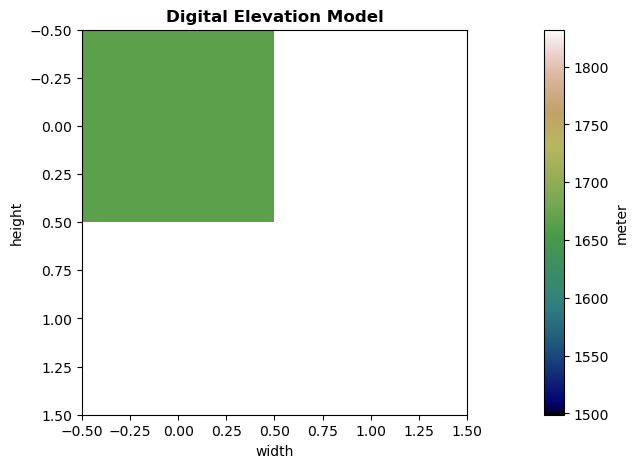

In [21]:
# Create figure
import matplotlib.pyplot as plt
fig = plt.figure(figsize=[20, 5])

# Plot dem
plt.imshow(dem, cmap='gist_earth')

# Customize plot
plt.colorbar(label='meter')
plt.title('Digital Elevation Model', fontweight='bold')
plt.xlabel('width')
plt.ylabel('height')

# Show plot
plt.show()


In [22]:
from ridge_map import RidgeMap
import matplotlib.pyplot as plt

In [28]:
# Define the bounding box coordinates for Mt. Shasta
shiprock_bbox = (-108.9047922, 36.6921478, -108.8881202, 36.7059292)

In [29]:
rm = RidgeMap(shiprock_bbox)

In [33]:
values = rm.get_elevation_data(num_lines=3000)

<Axes: >

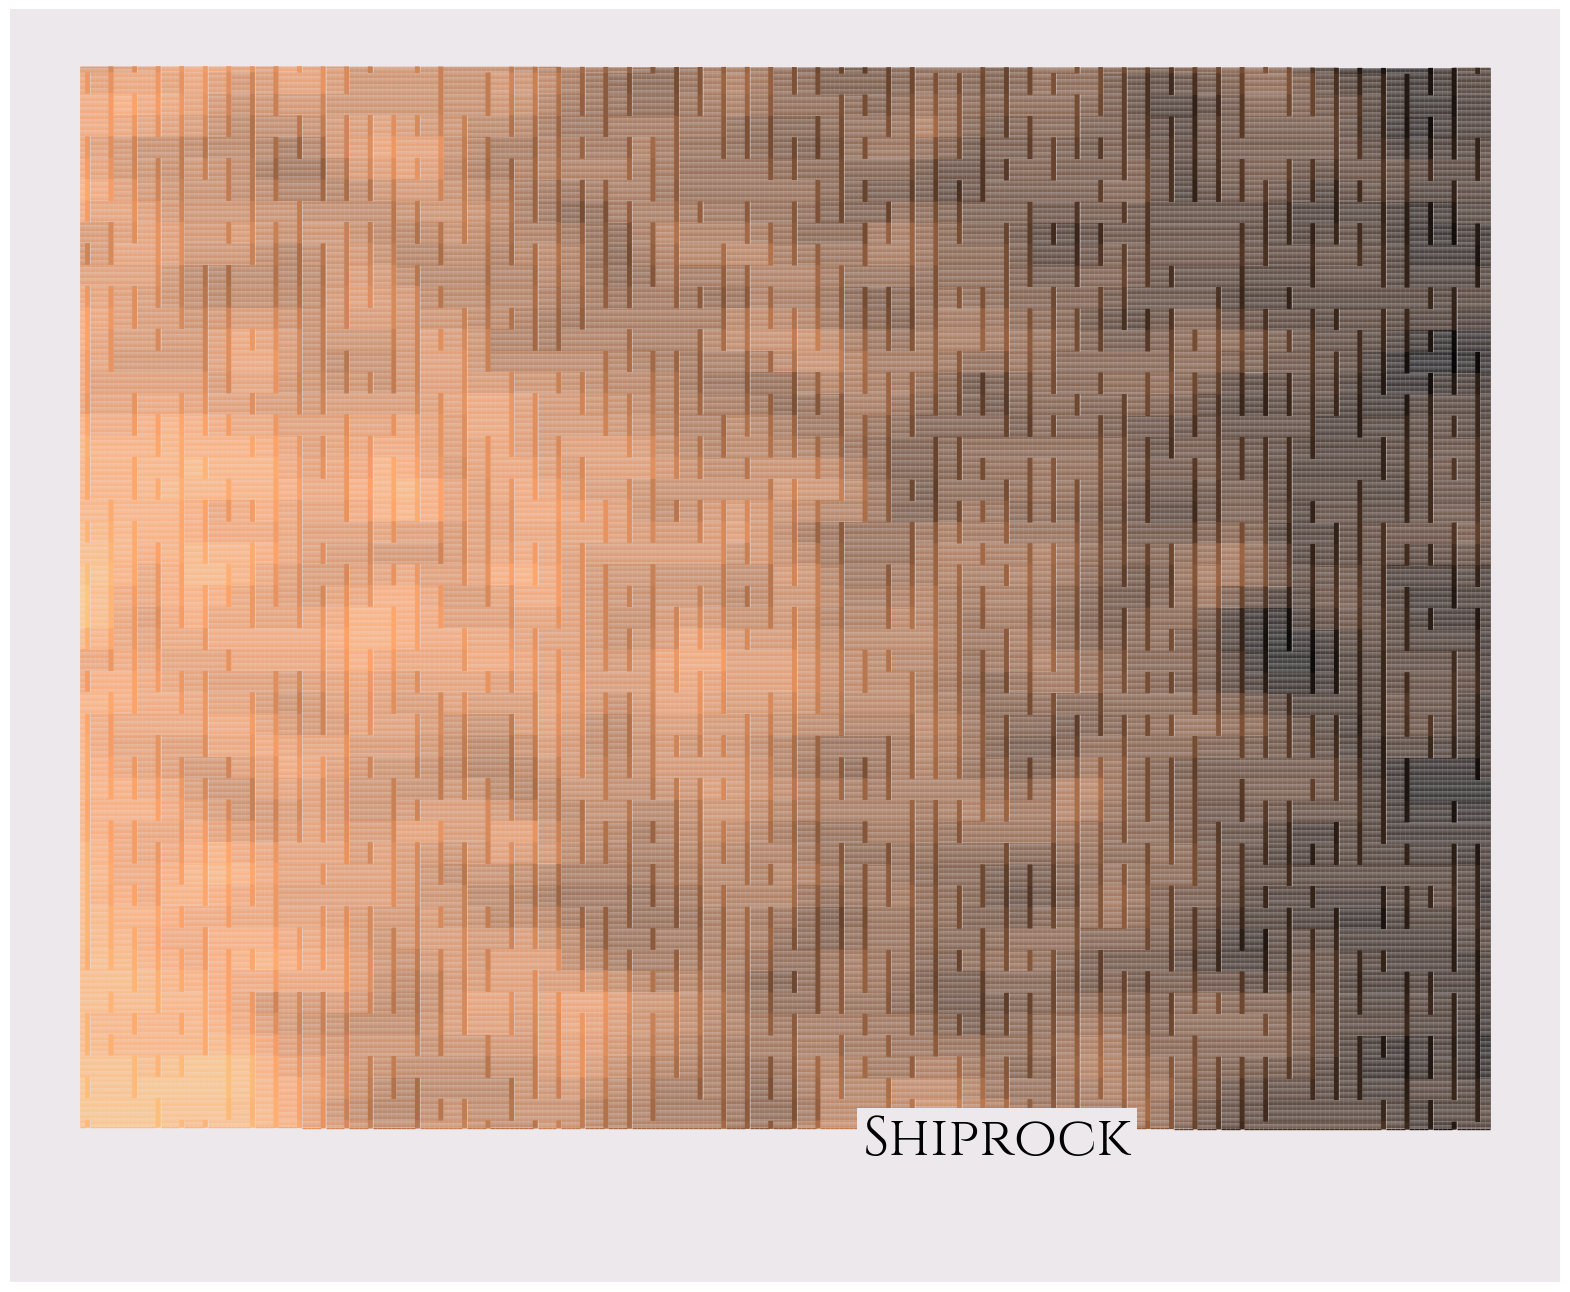

In [34]:
rm.plot_map(values=values,
            label='Shiprock',
            label_y=0.1,
            label_x=0.55,
            label_size=40,
            linewidth=1,
            line_color=plt.get_cmap('copper'),
            kind='elevation')